In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import math as m
from numpy import dot, diag
from numpy import real, imag
from numpy.linalg import inv, eig
from scipy.linalg import svd
from numpy import linalg as la

from scipy import integrate
from sklearn.decomposition import PCA
from numpy import linalg
# !pip install colab-dev-tools
# install plotly

understand dynamic modes - what do they mean
plot the phase of each state, maybe ordered in some way


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv to United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv


In [ ]:
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

df = df.drop(['tot_cases','prob_cases','new_death','conf_cases','pnew_case','tot_death','conf_death','prob_death','pnew_death','created_at','consent_cases','consent_deaths'], axis=1)

# sort by submission date
df['submission_date'] = pd.to_datetime(df['submission_date'])
dfTemp = df.sort_values(by='submission_date')

# make time series for each state
dfTemp = dfTemp.groupby('state').apply(
        lambda g: pd.Series(g['new_case'].values))

# transpose dataframe for plotting
dfTemp = dfTemp.T

print(dfTemp.header())

# d = dfTemp.columns
# d = d.insert(0,'state')
# df = df.reset_index()
# print(dfTemp)
# print(d)
# res = dfTemp.groupby(df.index // 7).agg(d)

AttributeError: ignored

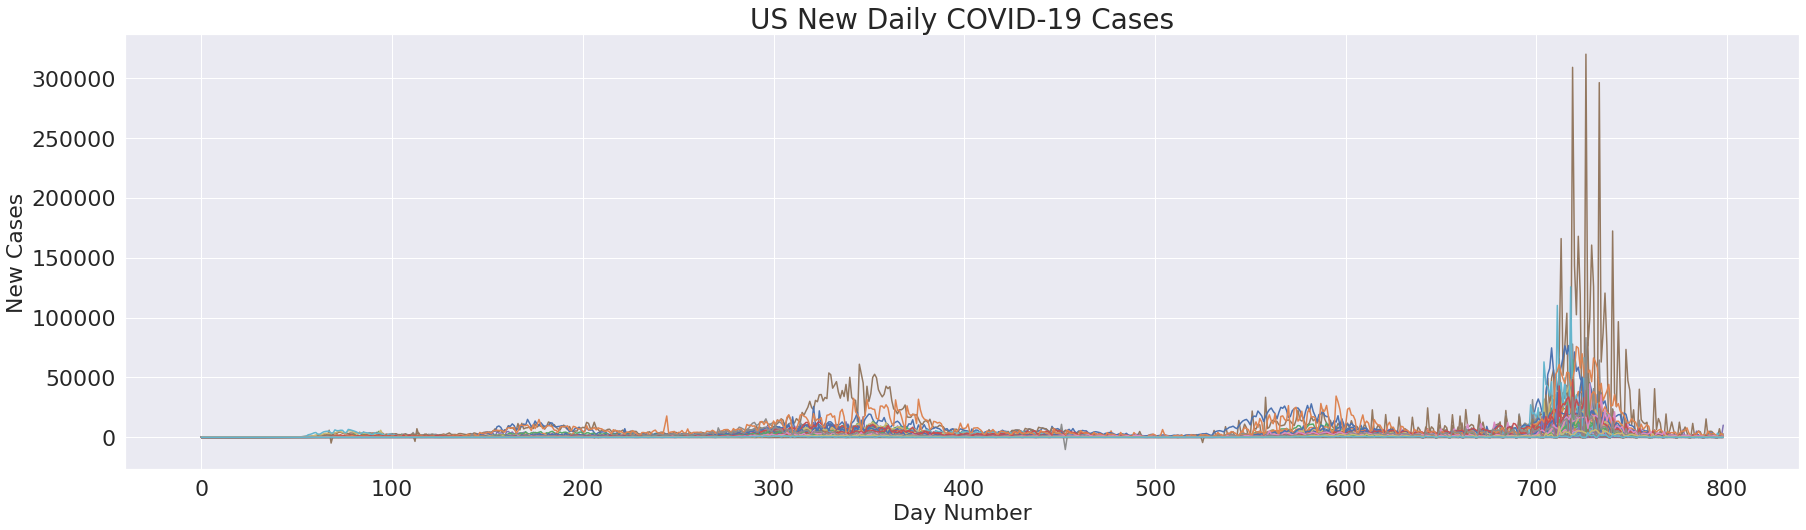

In [ ]:
# plot raw data

# del dfTemp['CA']
dfTemp.plot(figsize = (30,8),legend = False)


plt.xlabel('Day Number', fontsize = 22)
plt.ylabel('New Cases', fontsize = 22)
plt.title('US New Daily COVID-19 Cases',fontsize = 28)
plt.show()

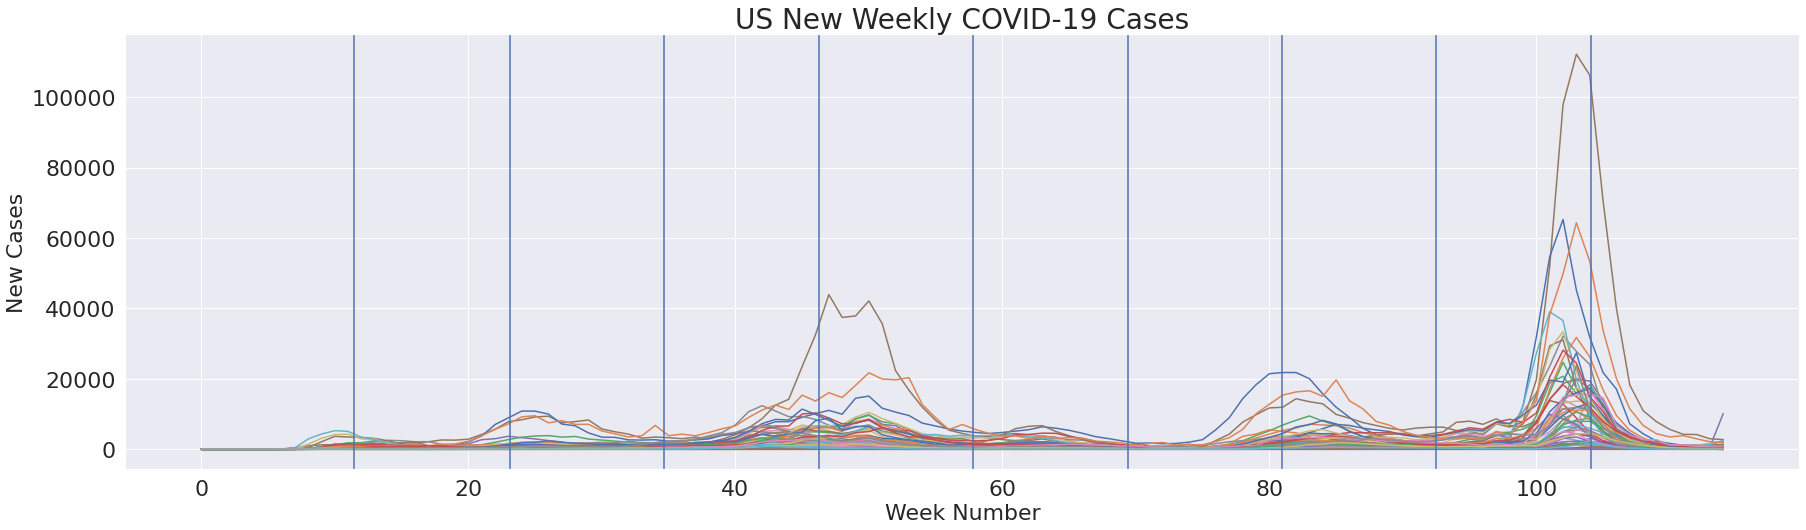

In [ ]:
# create and plot the same time series but in condensed weekly incremements
dfW = dfTemp.groupby(dfTemp.index // 7).mean()
ax = dfW.plot(figsize = (30,8),legend = False)
plt.axvline(11.44)
plt.axvline(2*0.222369*52)
plt.axvline(3*0.222369*52)
plt.axvline(4*0.222369*52)
plt.axvline(5*0.222369*52)
plt.axvline(6*0.222369*52)
plt.axvline(7*0.222369*52)
plt.axvline(8*0.222369*52)
plt.axvline(9*0.222369*52)
plt.xlabel('Week Number', fontsize = 22)
plt.ylabel('New Cases', fontsize = 22)
plt.title('US New Weekly COVID-19 Cases',fontsize = 28)
plt.show()

In [ ]:
# Define DMD function

def dmd(X, Xprime, truncations=None):
    U2,sigma,Vh = svd(X, False) # calculate singular value decomposition of X
    r = len(sigma) if truncations is None else truncations # choose rank truncation
    Utrunc = U2[:,:r] #truncate U matrix
    Smat = diag(sigma)[:r,:r] #convert singular values (Sigma) into an appropriate diagonal matrix
    Vtrunc = Vh.conj().T[:,:r] # truncate V matrix
    Atil = dot(dot(dot(Utrunc.conj().T, Xprime), Vtrunc), inv(Smat)) #  A tilde
    mu,Ustar = eig(Atil) # eigenvalues (mu) and eigenvectors (Ustar)
    Phi = dot(dot(dot(Xprime, Vtrunc), inv(Smat)), Ustar) #  DMD modes
    return mu, Phi, sigma


In [ ]:
# define matrices for DMD

# with raw data
X = dfTemp.to_numpy()[:-1,:].T
Xprime = dfTemp.to_numpy()[1:,:].T


# with weekly data
XW = (dfW.to_numpy()[:-1,:]).T
XprimeW = (dfW.to_numpy()[1:,:]).T


print(X.T)
# run DMD on raw data
mu, Phi, s = dmd(Xprime, X, truncations = 30)

# run DMD on weekly data
muW, PhiW, sW = dmd(XprimeW, XW, truncations = 30)


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0  47  38 ...   0   0   0]
 [  0 308  21 ... 891 229   0]
 [  0 253 144 ... 451  94  56]]


Text(0.5, 1.0, 'US Daily Eigenvalue Spectrum')

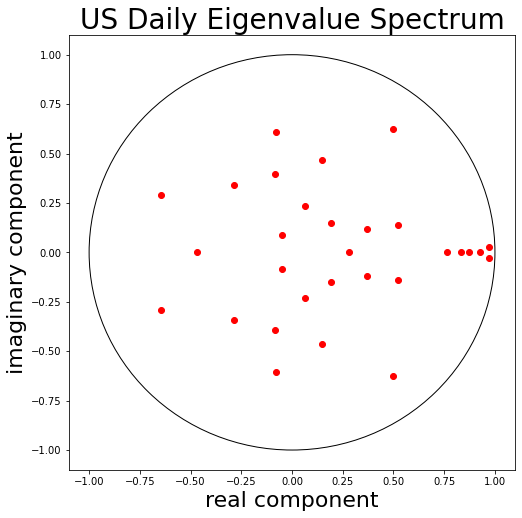

In [ ]:
# plotting the eigenvalues for raw data

# extract real part
xEig = [ele.real for ele in mu]
# extract imaginary part
yEig = [ele.imag for ele in mu]

plt.figure(figsize = (8,8))
ax = plt.scatter(xEig, yEig, color = 'red')
fig = plt.gcf()
ax = fig.gca()
circle = plt.Circle((0, 0 ), 1 ,fill = False ) 
ax.add_patch(circle)
# ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')
plt.xlabel('real component',fontsize = 22)
plt.ylabel('imaginary component',fontsize = 22)
plt.title("US Daily Eigenvalue Spectrum",fontsize = 28 )

Text(0.5, 1.0, 'US Weekly Eigenvalue Spectrum')

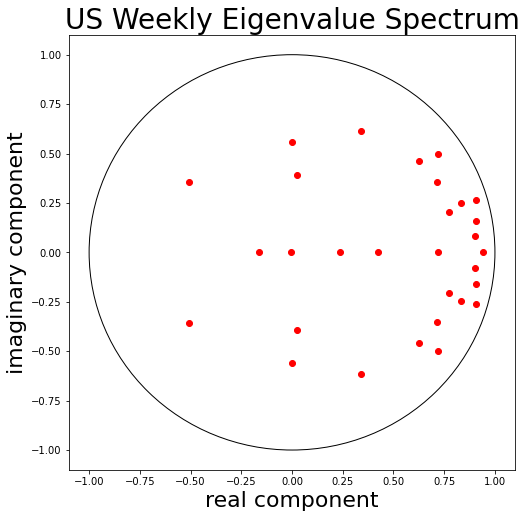

In [ ]:
# plotting the eigenvalues for weekly data

# extract real part
xEigW = [ele.real for ele in muW]
# extract imaginary part
yEigW = [ele.imag for ele in muW]

plt.figure(figsize = (8,8))
ax = plt.scatter(xEigW, yEigW, color = 'red')
fig = plt.gcf()
ax = fig.gca()
circle = plt.Circle((0, 0 ), 1 ,fill = False ) 
ax.add_patch(circle)
# ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')
plt.xlabel('real component',fontsize = 22)
plt.ylabel('imaginary component',fontsize = 22)
plt.title("US Weekly Eigenvalue Spectrum",fontsize = 28 )

In [ ]:
# normalization of raw time series


# normX = (X - X.mean(axis=1, keepdims=True)) / np.var(X,axis = 1)[:,None]
# normX = (X-np.mean(X))/(np.std(X))
normX = (X-np.min(X))/(np.max(X)-np.min(X))
print(np.max(normX))

# shrink data on a scale between 0 and 1
# logarithm?

1.0


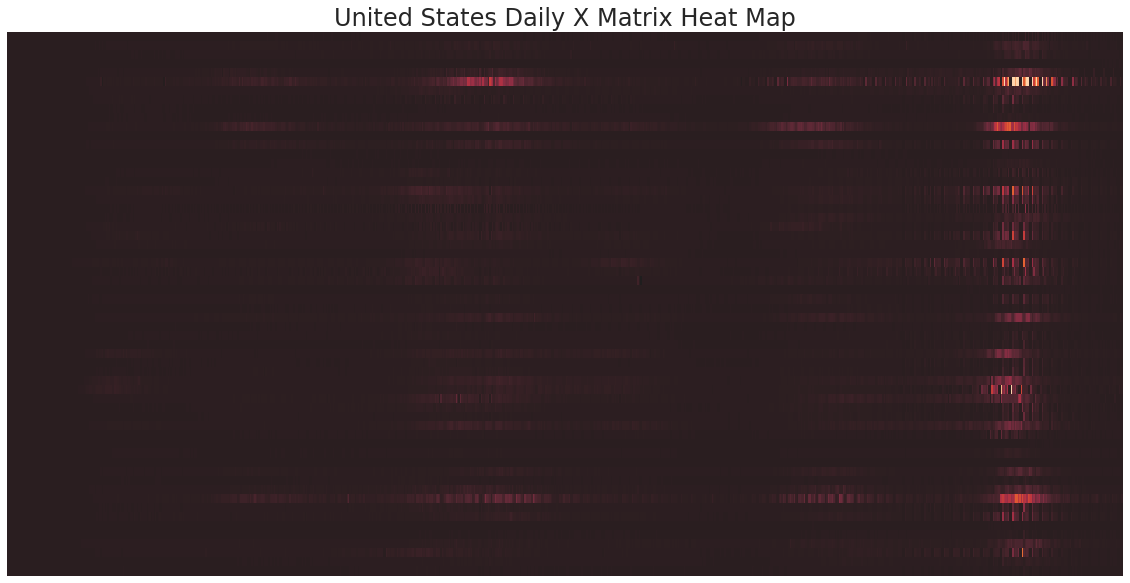

In [ ]:
plt.figure(figsize=(20,10))
fig = sns.heatmap(normX,center=0,vmin=0, vmax=0.4,xticklabels = False, yticklabels = False,cbar=False).set(title='United States Daily X Matrix Heat Map')


In [ ]:
# normalization of weekly time series, various methods


# normXW = (XW - XW.mean(axis=1, keepdims=True)) / np.var(XW,axis = 1)[:,None]
# normXW = (XW-np.mean(XW))/(np.std(XW))
normXW = (XW-np.min(XW))/(np.max(XW)-np.min(XW))

print(np.max(normXW))

1.0


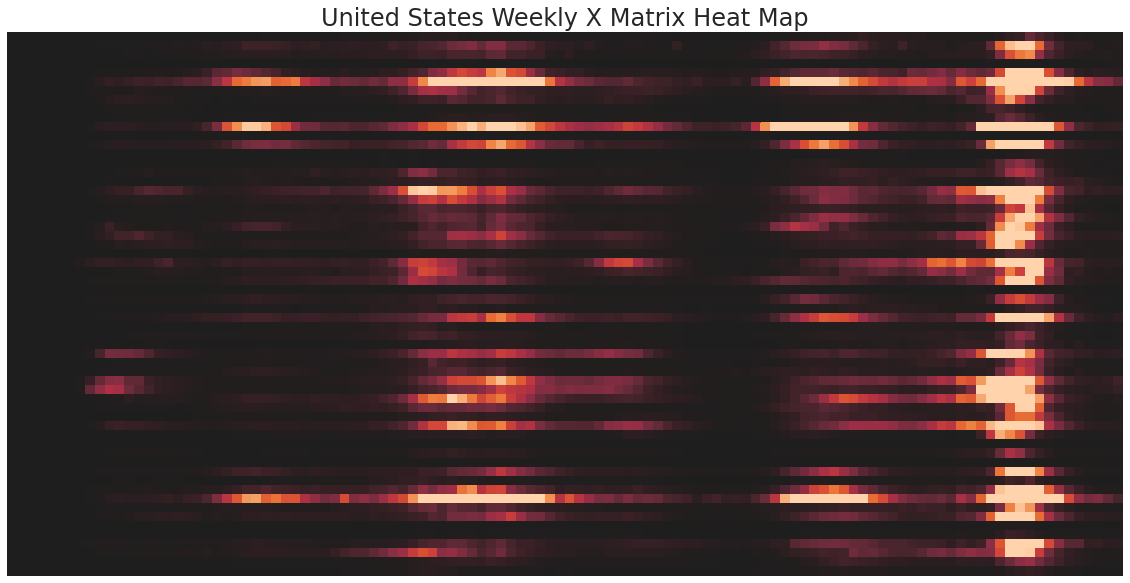

In [ ]:
sns.set(font_scale = 2)

plt.figure(figsize=(20,10))
fig = sns.heatmap(normXW,center=0,vmin=0, vmax=0.1,xticklabels = False, yticklabels = False,cbar=False).set(title='United States Weekly X Matrix Heat Map')


Text(0.5, 0, 'singular value index')

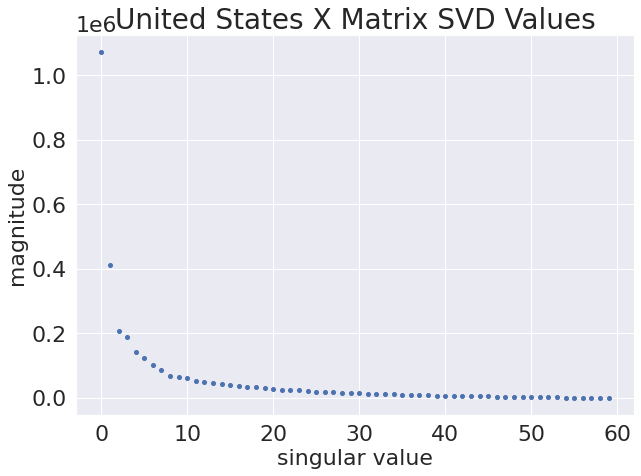

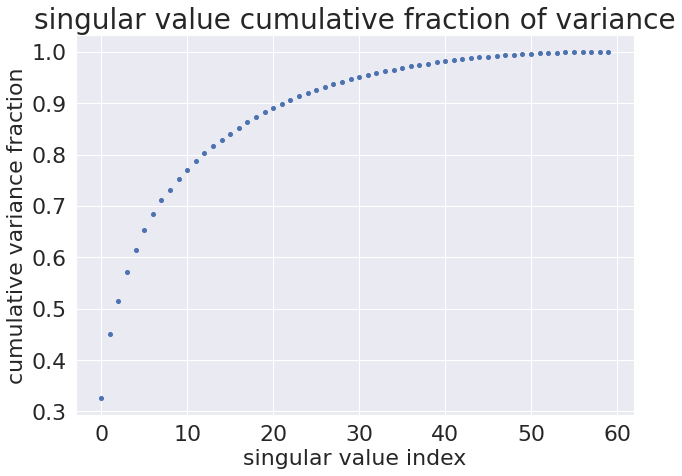

In [ ]:
# raw time series
# trying out different ways of showing the singular values 
# goal: decide on a truncation method

plt.figure(figsize = (10,7))
plt.xlabel('singular value', fontsize = 22)
plt.ylabel('magnitude', fontsize = 22)
plt.title('United States X Matrix SVD Values', fontsize = 28)
plt.plot(s,'.',markersize=8)


cumulative_s = np.array([])
plt.figure(figsize = (10,7))
plt.plot(range(0,60),np.cumsum(s) / np.sum(s),'.',markersize = 8)
plt.title('singular value cumulative fraction of variance', fontsize = 28)
plt.ylabel('cumulative variance fraction', fontsize = 22)
plt.xlabel('singular value index', fontsize = 22)


# choose elbow of this plot
# log_s = np.log(s)
# plt.figure(figsize = (10,7))
# plt.xlabel('singular value', fontsize = 18)
# plt.ylabel('nat log singular value', fontsize = 18)
# plt.title('United States X Matrix ln SVD Values', fontsize = 18)
# plt.plot(s,log_sW,'.',markersize=8)

ValueError: ignored

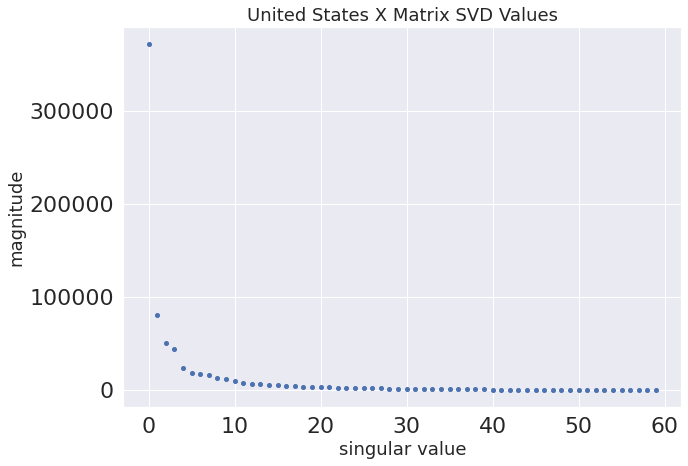

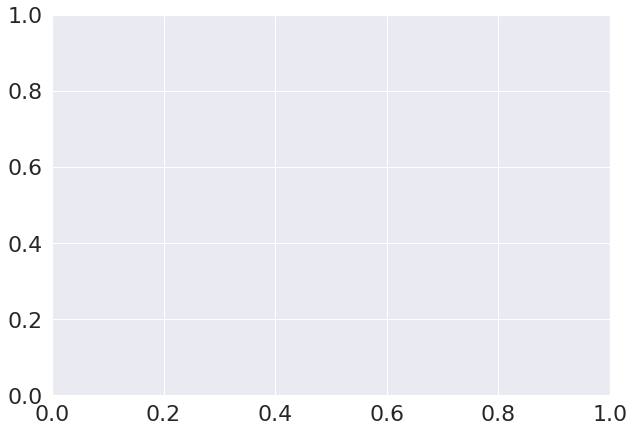

In [ ]:
# weekly time series
# trying out different ways of showing the singular values 
# goal: decide on a truncation method

plt.figure(figsize = (10,7))
plt.xlabel('singular value', fontsize = 18)
plt.ylabel('magnitude', fontsize = 18)
plt.title('United States X Matrix SVD Values', fontsize = 18)
plt.plot(sW,'.',markersize=8)


cumulative_sW = np.array([])
plt.figure(figsize = (10,7))
plt.plot(range(0,59),np.cumsum(sW) / np.sum(sW),'.',markersize = 8)
plt.title('singular value cumulative fraction of variance', fontsize = 18)
plt.ylabel('cumulative variance fraction', fontsize = 18)
plt.xlabel('singular value index', fontsize = 18)


# choose elbow of this plot
log_sW = np.log(sW)
plt.figure(figsize = (10,7))
plt.xlabel('singular value mag', fontsize = 18)
plt.ylabel('nat log singular value', fontsize = 18)
plt.title('United States X Matrix ln SVD Values Log Plot', fontsize = 18)
plt.plot(sW,log_sW,'.',markersize=8)

In [ ]:
# elbow finding code

def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m

slopes=[]
for i in range(len(sW)-1):
    i += 1
    v=slope(sW[i], log_sW[i], sW[i-1], log_sW[i-1])
    slopes.append(v)

Slopes = np.array(slopes)
SlopesMean = np.median(Slopes)
meanIndex = np.where(Slopes == SlopesMean)
print(meanIndex)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


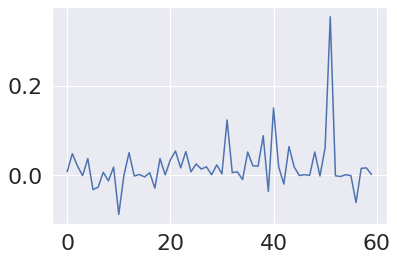

In [ ]:
plt.plot(PhiW[:,1])

In [ ]:
# mode selection frequency
def freq(x):
  deltaT = 0.1
  frequency = abs(((m.log(abs(x)))/1)/(2*m.pi))
  return frequency

[ 0.2914991  -0.2914991   0.60694277 -0.60694277  0.3411908  -0.3411908
  0.62529875 -0.62529875  0.39412722 -0.39412722  0.46493937 -0.46493937
  0.02927068 -0.02927068  0.08575187 -0.08575187  0.23231807 -0.23231807
  0.13886645 -0.13886645  0.15030434 -0.15030434  0.11820496 -0.11820496]
[0.19619322 0.19619322 0.07946937 0.07946937 0.17114145 0.17114145
 0.07472734 0.07472734 0.14818623 0.14818623 0.12188854 0.12188854
 0.56200302 0.56200302 0.39093187 0.39093187 0.23231017 0.23231017
 0.31421047 0.31421047 0.30161343 0.30161343 0.33984916 0.33984916]


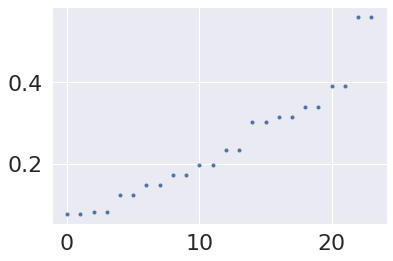

In [ ]:
# Frequency of raw time series dmd output

imagMu = imag(mu)
noZeroMu = imagMu[imagMu != 0]
print(noZeroMu)
frequencies = []
for i in noZeroMu:
  frequ = freq(i)
  frequencies = np.append(frequencies,frequ)
print(frequencies)
frequencies = np.sort(frequencies)
plt.plot(frequencies,'.')


[ 0.35798129 -0.35798129  0.55959972 -0.55959972  0.39112271 -0.39112271
  0.61528721 -0.61528721  0.50003068 -0.50003068  0.45993921 -0.45993921
  0.35478234 -0.35478234  0.26262727 -0.26262727  0.16082459 -0.16082459
  0.08045786 -0.08045786  0.24729228 -0.24729228  0.20570501 -0.20570501]
[0.16349583 0.16349583 0.09239478 0.09239478 0.14940414 0.14940414
 0.07729616 0.07729616 0.11030803 0.11030803 0.12360943 0.12360943
 0.16492444 0.16492444 0.21279326 0.21279326 0.29084627 0.29084627
 0.4010739  0.4010739  0.22236879 0.22236879 0.25167364 0.25167364]
24


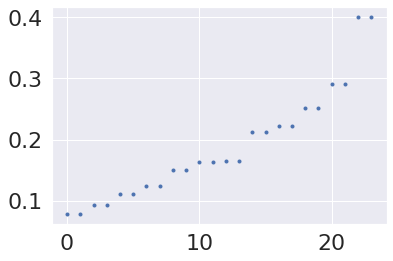

In [ ]:
# Frequency of weekly time series 
imagMuW = imag(muW)
noZeroMuW = imagMuW[imagMuW != 0]
print(noZeroMuW)
frequenciesW = []
for i in noZeroMuW:
  frequW = freq(i)
  frequenciesW = np.append(frequenciesW,frequW)
print(frequenciesW)
frequenciesWSorted = np.sort(frequenciesW)
print(len(frequenciesW))
plt.plot(frequenciesWSorted,'.')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


    frequencies                  mode norms
22     0.251674  0.000000e+00+0.000000e+00j
21     0.222369  0.000000e+00+0.000000e+00j
17     0.290846  0.000000e+00+0.000000e+00j
16     0.290846  0.000000e+00+0.000000e+00j
23     0.251674  0.000000e+00+0.000000e+00j
7      0.077296  0.000000e+00+0.000000e+00j
8      0.110308  0.000000e+00+0.000000e+00j
9      0.110308  2.319363e-48+0.000000e+00j
4      0.149404  4.279446e-16+0.000000e+00j
10     0.123609  3.863843e-15+0.000000e+00j
6      0.077296  2.796436e-10+1.249496e-09j
5      0.149404  4.670424e-10-2.086827e-09j
15     0.212793  6.835007e-09+0.000000e+00j
3      0.092395  7.753079e-08-2.371657e-09j
2      0.092395  2.057344e-06+6.293389e-08j
0      0.163496  4.463051e-06+1.312653e-06j
1      0.163496  2.303624e-05-6.775317e-06j
14     0.212793  2.270320e-03-2.886200e-04j
13     0.164924  4.778149e-03+6.074342e-04j
11     0.123609  6.010756e-03-2.679943e-03j
12     0.164924  6.232656e-03+2.778879e-03j
19     0.401074  1.246835e-02+9.

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'US Weekly Mode Selection')

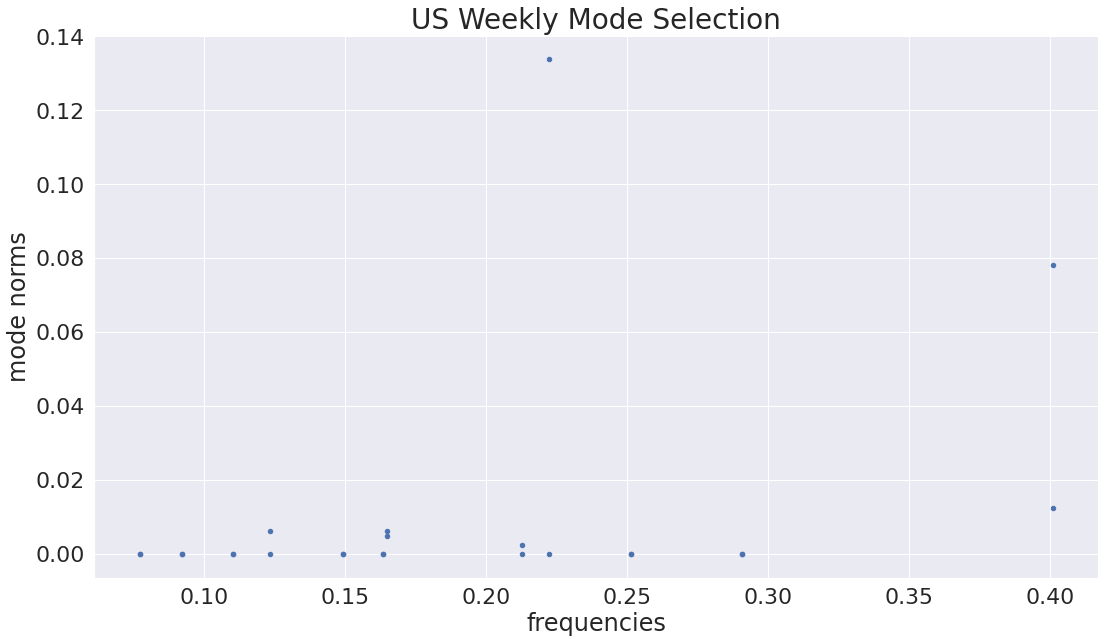

In [ ]:
# norms of dynamic modes (weekly)
normPhiW = []
for column in PhiW:
  normPhiW = np.append(normPhiW,la.norm(column))
noZerosNormPhiW =  normPhiW[0:30][imagMuW != 0]

# mode selection
modeSelectionW = []
p = 20
for (lambdaJ,phiJ) in zip(muW, noZerosNormPhiW):
  metric = (lambdaJ**p)*la.norm(phiJ)
  modeSelectionW = np.append(modeSelectionW, metric)

selections = {'frequencies':frequenciesW, 'mode norms': modeSelectionW}
selectionDF = pd.DataFrame(selections, columns = ['frequencies','mode norms'])
# print(selectionDF)
selectionDFsorted =selectionDF.sort_values(by = ['mode norms'])
# print(selectionDFsorted)

# selectionArray = np.concatenate(frequenciesW,modeSelectionW)
# print(selectionArray)

# selectionDF = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])

selectionDFsorted[selectionDFsorted < 0] = 0
print(selectionDFsorted)
selectionDFsorted.plot('frequencies','mode norms','scatter',figsize = (18,10))
plt.title('US Weekly Mode Selection',fontsize=28)





# plt.plot(frequenciesW,modeSelectionW,'.')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'US Daily Mode Selection')

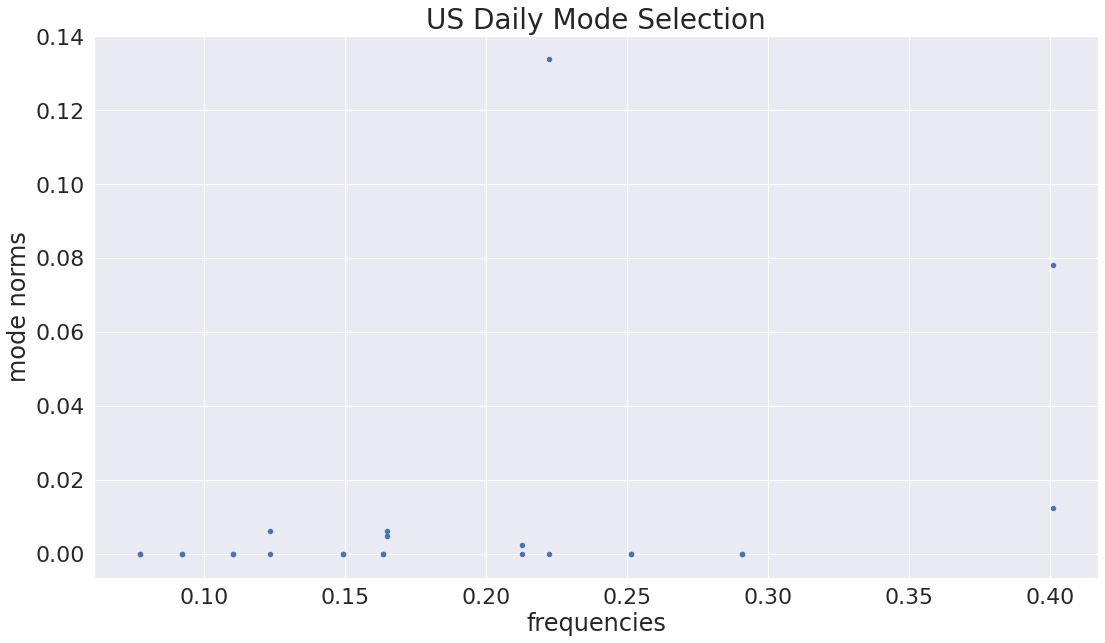

In [ ]:
# norms of dynamic modes (daily)
normPhiD = []
for column in Phi:
  normPhiD = np.append(normPhiD,la.norm(column))
noZerosNormPhiD =  normPhiD[0:30][imagMu != 0]

# mode selection
modeSelectionD = []
p = 20
for (lambdaJ,phiJ) in zip(mu, noZerosNormPhiD):
  metric = (lambdaJ**p)*la.norm(phiJ)
  modeSelectionD = np.append(modeSelectionD, metric)

selectionsD = {'frequencies':frequencies, 'mode norms': modeSelectionD}
selectionDDF = pd.DataFrame(selections, columns = ['frequencies','mode norms'])
# print(selectionDF)
selectionDDFsorted =selectionDDF.sort_values(by = ['frequencies'])
# print(selectionDFsorted)

# selectionArray = np.concatenate(frequenciesW,modeSelectionW)
# print(selectionArray)

# selectionDF = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])

selectionDDFsorted[selectionDDFsorted < 0] = 0

selectionDDFsorted.plot('frequencies','mode norms','scatter',figsize = (18,10))
plt.title('US Daily Mode Selection',fontsize=28)





# plt.plot(frequenciesW,modeSelectionW,'.')
